## Importing Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [ ]:
### Import Data

path = r'C:\Users\shaiv\Downloads\ClimateWins'

In [ ]:
# Import climate_cleaned data

climate = pd.read_csv(os.path.join(path, '02 Data', 'weather_clean.csv'), index_col = False)

In [ ]:
### Import the  weather data
weather = pd.read_csv(os.path.join(path, '02 Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [47]:
climate.shape

(22950, 170)

In [48]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.00,0,0.8,-0.3,1.6,7,0.91,1.0010,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84

In [49]:
weather.shape

(22950, 16)

In [50]:
weather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Wrangling
- Reduce data to one station only : STOCKHOLM

In [51]:
# Reduce climate dataset to 2010's

climate = climate[(climate['DATE'].astype(str).str[:4] >= '2010') & (climate['DATE'].astype(str).str[:4] <= '2019')]
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,2.3,0.93,0.9965,0.18,0.56,0,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,3.8,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,3.9,0.89,0.9997,0.12,0.02,0,0.0,-1.1,-2.8,-0.6,6,0.85,0.00,2,-2.6,-5.4,-0.3,2,0.77,1.0056,0.49,0.00,0,6.4,1.6,-0.5,5.0,3.1,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,1.0,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,4.6,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,4.4,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,0.20,0.43,0,0.0,3.1,0.1,4.9,7,6.0,0.76,1.0110,0.04,0.24,33,0.0,-7.7,-8.9,-4.9,3,5.0,0.73,1.0152,7.1,15.4,4,7.5,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,3.4,0.86,1.0040,0.11,0.00,0.6,-0.7,1.8,1,0.80,1.0121,0.43,0.00,0,6.0,1.7,-1.6,5.0
18264

In [54]:
# Create a list of the columns containing "" in their names

STOCKHOLM_list = list(x for x in climate.columns if x.find('STOCKHOLM') >=0)
STOCKHOLM_list

['STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max']

In [56]:
# Create a dataframe with those columns

df_STOCKHOLM= climate[STOCKHOLM_list]
df_STOCKHOLM

,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max
18263,6,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0
18264,7,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1
18265,7,1.0124,0.09,0.00,0.6,-9.4,-11.9,-7.1
18266,4,1.0027,0.11,0.01,1.0,-6.1,-8.3,-3.6
18267,4,1.0099,0.14,0.00,1.9,-14.7,-16.9,-5.5
...,...,...,...,...,...,...,...,...
21910,5,1.0316,0.08,0.01,0.5,-0.8,-1.5,0.2
21911,5,1.0380,0.12,0.07,1.7,-2.1,-3.1,-1.0
21912,5,1.0198,0.05,0.00,0.0,2.8,-1.9,5.8
21913,5,1.0020,0.05,0.00,0.0,8.1,5.3,9.6


In [57]:
# Create a dataframe with those columns

climate_STOCKHOLM = climate[STOCKHOLM_list]
climate_STOCKHOLM

,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max
18263,6,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0
18264,7,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1
18265,7,1.0124,0.09,0.00,0.6,-9.4,-11.9,-7.1
18266,4,1.0027,0.11,0.01,1.0,-6.1,-8.3,-3.6
18267,4,1.0099,0.14,0.00,1.9,-14.7,-16.9,-5.5
...,...,...,...,...,...,...,...,...
21910,5,1.0316,0.08,0.01,0.5,-0.8,-1.5,0.2
21911,5,1.0380,0.12,0.07,1.7,-2.1,-3.1,-1.0
21912,5,1.0198,0.05,0.00,0.0,2.8,-1.9,5.8
21913,5,1.0020,0.05,0.00,0.0,8.1,5.3,9.6


In [58]:
# Reduce weather dataset to 2010's

weather= weather[(weather['DATE'].astype(str).str[:4] >= '2010') & (weather['DATE'].astype(str).str[:4] <= '2019')]
weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
# Reduce weather dataset to STOCKHOLM's answers only

weather_STOCKHOLM = weather['STOCKHOLM_pleasant_weather']
weather_STOCKHOLM

18263    0
18264    0
18265    0
18266    0
18267    0
        ..
21910    0
21911    0
21912    0
21913    0
21914    0
Name: STOCKHOLM_pleasant_weather, Length: 3652, dtype: int64

In [60]:
climate_STOCKHOLM.shape

(3652, 8)

In [61]:
weather_STOCKHOLM.shape

(3652,)

## Reshaping for Modeling

In [62]:
X2 = climate_STOCKHOLM

In [63]:
y2 = weather_STOCKHOLM

In [64]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [65]:
X.shape

(3652, 8)

In [66]:
y.shape

(3652,)

## Data Split 

In [67]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [68]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 8) (2739,)
(913, 8) (913,)


In [69]:
X_train

array([[ 8.    ,  1.0008,  0.08  , ...,  3.6   ,  1.8   ,  6.2   ],
       [ 5.    ,  1.0114,  1.39  , ..., 10.7   ,  8.    , 13.5   ],
       [ 5.    ,  1.0042,  1.16  , ...,  5.3   ,  1.6   ,  8.5   ],
       ...,
       [ 5.    ,  1.0114,  2.13  , ..., 14.    ,  9.5   , 19.9   ],
       [ 5.    ,  1.0085,  1.77  , ..., 17.4   , 13.8   , 22.3   ],
       [ 5.    ,  1.017 ,  1.07  , ..., 16.7   , 14.4   , 19.6   ]])

In [70]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,

## Hyperparameter Optimization

### Grid Search

In [71]:
# Create a RF classifier

clf= RandomForestClassifier()

In [72]:
grid_space = {
    'max_depth': [3, 10, None],  # Focus on a smaller range
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_features': [15, 50],  # Focus on fewer values
    'min_samples_leaf': [1, 2],  # Smaller range
    'min_samples_split': [2, 3]  # Avoid using 1 (invalid in sklearn)
}

In [73]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Search took 0.33430874745051065 minutes


In [74]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best GRID search score is: 1.0


### Random Search

In [75]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [76]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [77]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 3.5565732518831887 minutes


In [78]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 210}
Best RANDOM search score is: 1.0


In [79]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 210}
Best RANDOM search score is: 1.0


## Running Random Forest with Optimized Search Parameters

In [80]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 110, max_depth=70, max_features=6, min_samples_leaf=1, min_samples_split=6, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, max_features=6, min_samples_split=6,
                       n_estimators=110)

In [89]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  1.0


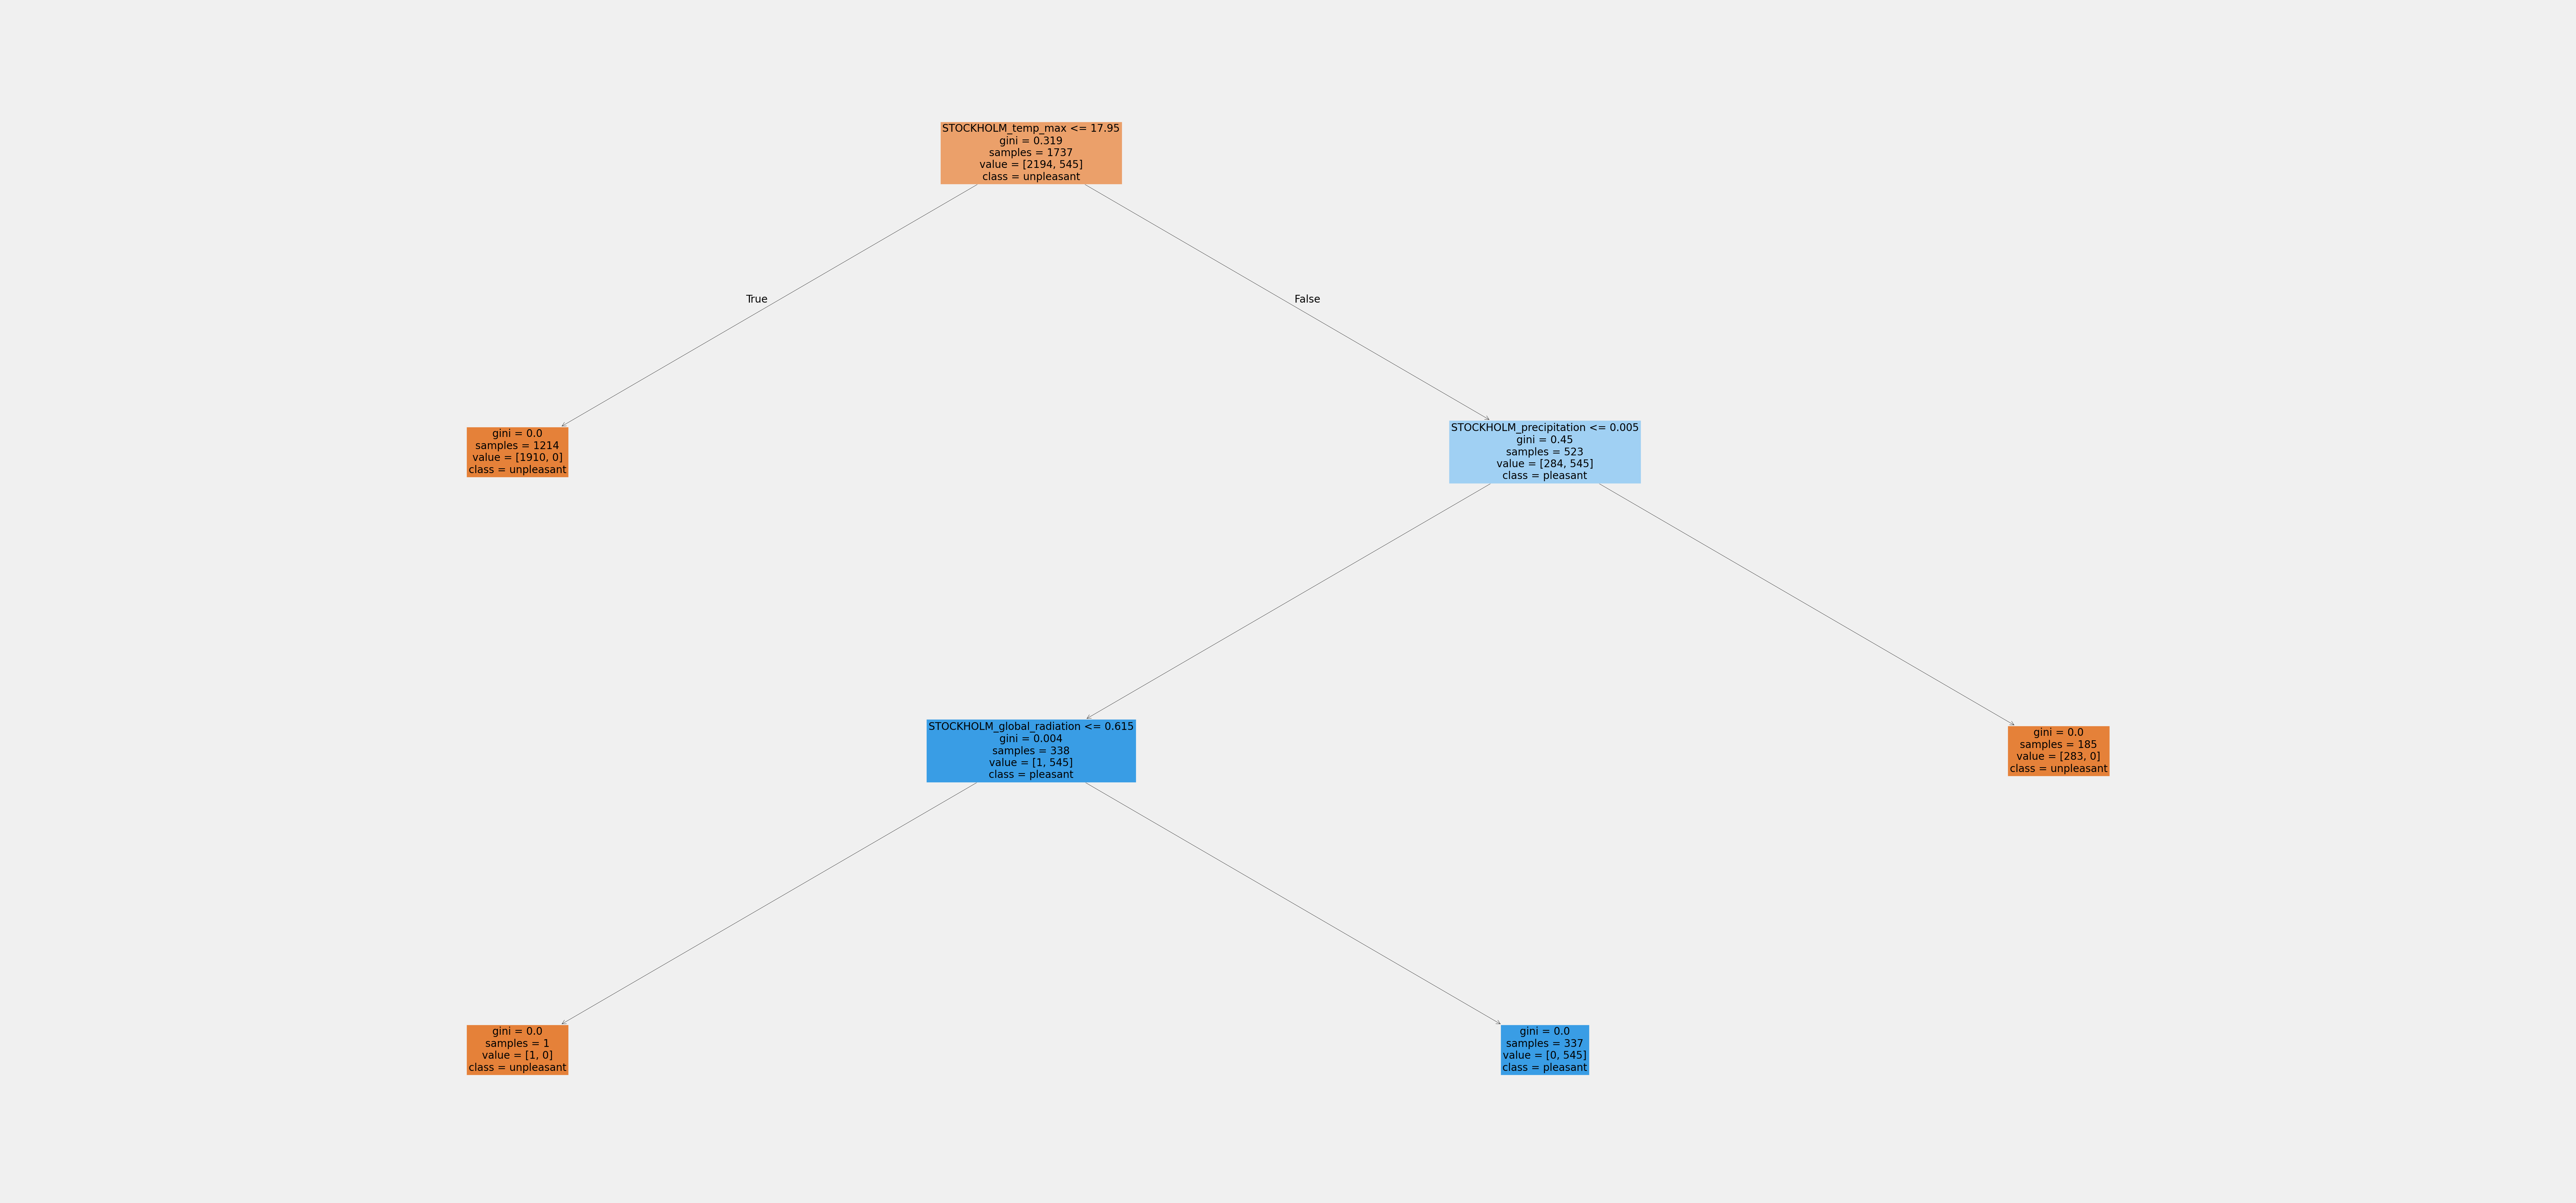

In [90]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[6], fontsize = 20, feature_names = df_STOCKHOLM.columns, class_names=['unpleasant', 'pleasant'], filled=True);

In [ ]:
fig.savefig(os.path.join(path, '04 Analysis and Visualizations', 'optimized_random_forest_STOCKHOLM.png'),bbox_inches='tight')

##  Uncovering Feature Importances

In [85]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(8,)


array([9.97654852e-05, 3.12813839e-03, 1.23721955e-02, 3.84489038e-01,
       3.29369700e-02, 1.23458544e-01, 3.53639704e-03, 4.39978951e-01])

In [86]:
# Create a list of weather features

wx_list = [feature.replace('STOCKHOLM_', '') for feature in STOCKHOLM_list]
wx_list

['STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max']

In [87]:
important = pd.Series(newarray, index = wx_list)
important

STOCKHOLM_cloud_cover         0.000100
STOCKHOLM_pressure            0.003128
STOCKHOLM_global_radiation    0.012372
STOCKHOLM_precipitation       0.384489
STOCKHOLM_sunshine            0.032937
STOCKHOLM_temp_mean           0.123459
STOCKHOLM_temp_min            0.003536
STOCKHOLM_temp_max            0.439979
dtype: float64

['STOCKHOLM_cloud_cover', 'STOCKHOLM_pressure', 'STOCKHOLM_global_radiation', 'STOCKHOLM_precipitation', 'STOCKHOLM_sunshine', 'STOCKHOLM_temp_mean', 'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max']


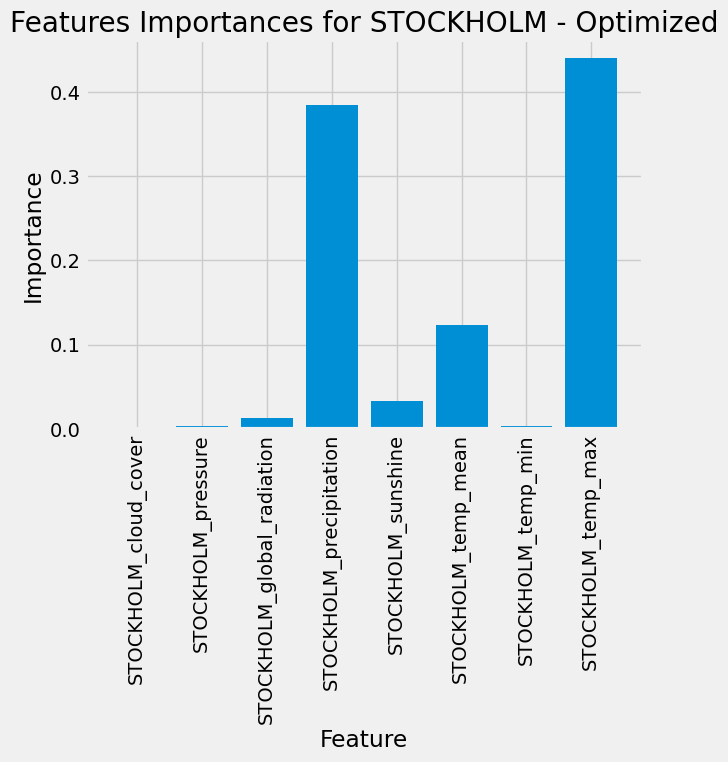

In [ ]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for STOCKHOLM - Optimized');

plt.savefig(os.path.join(path,'04 Analysis and Visualizations, 'STOCKHOLM_feature_importances_optimized.png'), bbox_inches='tight')
plt.show()